# IPL Project

Loading the Libaries and Datasets

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

df = pd.read_csv('https://raw.githubusercontent.com/AkarshVyas/Data-Visualization-Youtube/refs/heads/main/IPL.csv')
df.head()


,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


### Basic Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

check size

In [4]:
print(f"Your rows are {df.shape[0]} and your cols are {df.shape[1]}")

Your rows are 74 and your cols are 20


how many cols have null

In [5]:
df.isnull().sum()

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

## Questions

1. Which team won the most matched?

Text(0.5, 1.0, 'Most Matches Won by team')

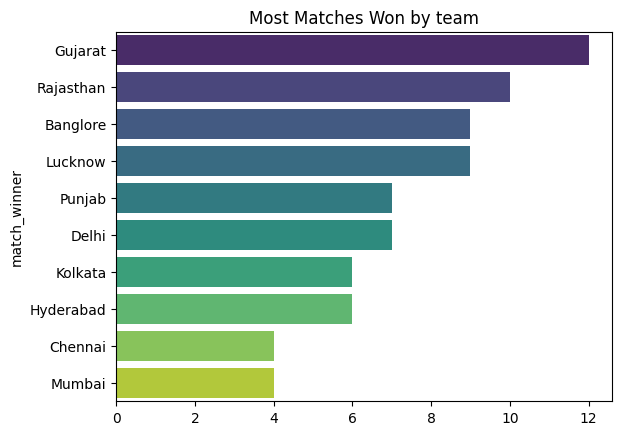

In [6]:
match_wins = df['match_winner'].value_counts()

sns.barplot(y=match_wins.index, x=match_wins.values, palette='viridis')
plt.title("Most Matches Won by team")

2. Toss decision trend

Text(0.5, 1.0, 'Toss Decision Trends')

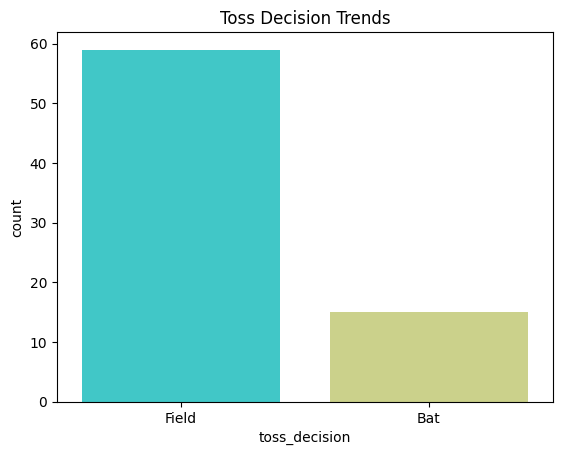

In [7]:
sns.countplot(x = df['toss_decision'], palette='rainbow')
plt.title("Toss Decision Trends")

3. Toss winner vs Match winner

In [8]:
count = df[df['toss_winner'] == df['match_winner']]['match_id'].count()
percentage = (count * 100)/df.shape[0]
percentage.round(2)

np.float64(48.65)

4. How do teams win? (Runs vs Wickets)

<Axes: xlabel='won_by', ylabel='count'>

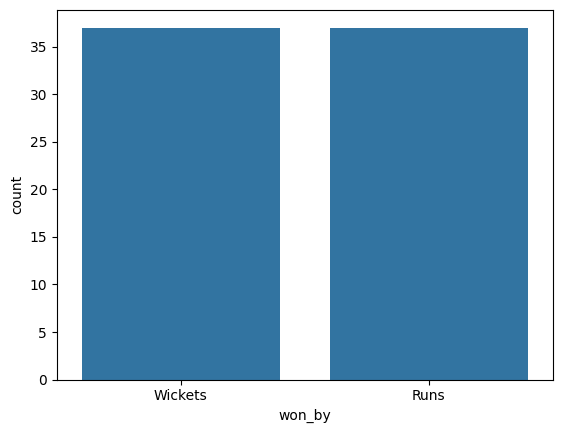

In [10]:
sns.countplot(x=df['won_by'])

### Key Player performances

1. Most "Player of the match" awards

Text(0.5, 1.0, 'Top 10 Players')

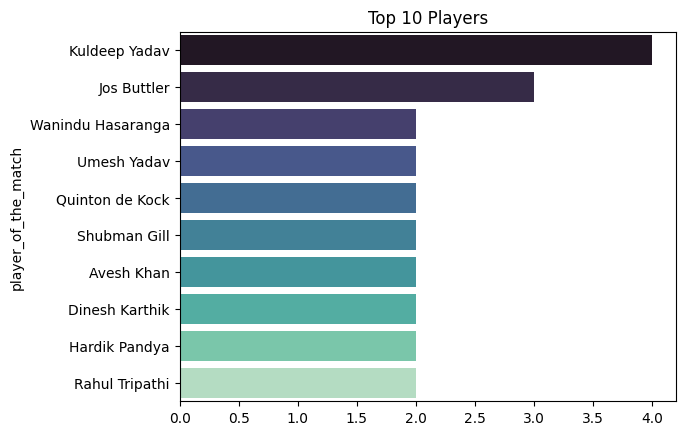

In [17]:
top10count = df['player_of_the_match'].value_counts().head(10)
sns.barplot(x = top10count.values, y = top10count.index, palette='mako')

plt.title('Top 10 Players')

2. 2 top scorers

<Axes: ylabel='top_scorer'>

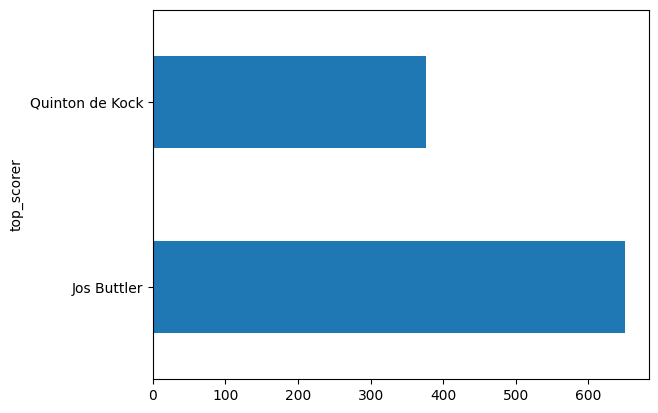

In [30]:
high = df.groupby('top_scorer')['highscore'].sum().sort_values(ascending=False).head(2)

high.plot(kind='barh')

3. 10 best bowling figures

<Axes: ylabel='best_bowling'>

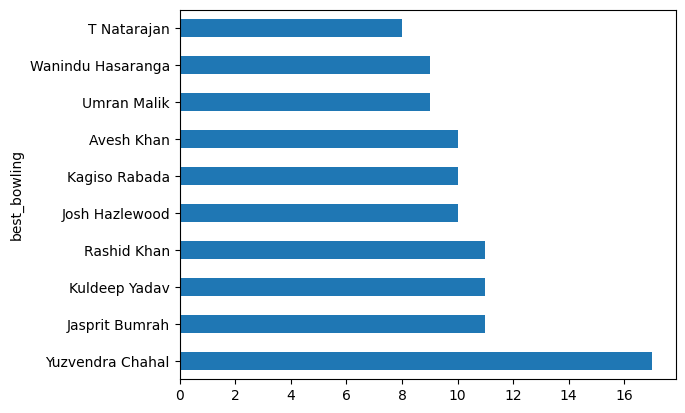

In [47]:
df['highest_wickets'] = df['best_bowling_figure'].apply(lambda x: x.split('--')[0])

df['highest_wickets'] = df['highest_wickets'].astype(int)

top_bowlers = df.groupby('best_bowling')['highest_wickets'].sum().sort_values(ascending=False).head(10)

top_bowlers.plot(kind='barh')

### Venue Analysis

1. Most matches played by Venue

<Axes: ylabel='venue'>

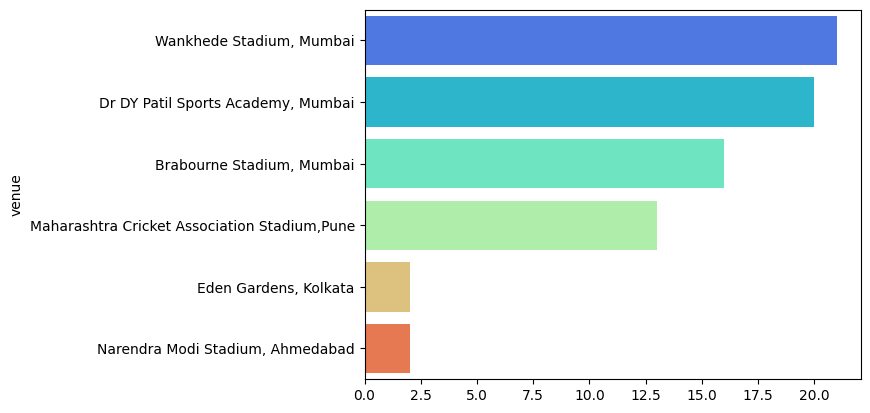

In [52]:
venue_counts =  df['venue'].value_counts()

sns.barplot(y=venue_counts.index, x=venue_counts.values, palette="rainbow")

### Custom Questions

1. Who won the highest margin by run?

In [ ]:
df[df['won_by'] == 'Runs'].sort_values(by='margin', ascending=False).head(1)[['match_winner', 'margin']]

,match_winner,margin
54,Chennai,91


2. Which player has highest individual score

In [60]:
df[df['highscore'] == df['highscore'].max()][['top_scorer', 'highscore']]

,top_scorer,highscore
65,Quinton de Kock,140


3. Which bowler had the best bowling figures

In [62]:
df[df['highest_wickets'] == df['highest_wickets'].max()][['best_bowling', 'best_bowling_figure']]

,best_bowling,best_bowling_figure
29,Yuzvendra Chahal,5--40
39,Umran Malik,5--25
53,Wanindu Hasaranga,5--18
55,Jasprit Bumrah,5--10
